In [1]:
%load_ext autoreload
%autoreload 2
from factor_processing_utils import *

In [2]:
# 研究时间
start_date = "2015-01-01"
end_date = "2025-07-01"

# 基准指数
index_item = "000985.XSHG"
# 调仓日
change_days = 20
# 分组数量
group_num = 10

# 券池
stock_universe = INDEX_FIX(start_date, end_date, index_item)
stock_list = stock_universe.columns.tolist()
date_list = stock_universe.index.tolist()

In [3]:
factor_definition = Factor("market_cap")
raw_factor = execute_factor(factor_definition, stock_list, start_date, end_date) * -1
raw_factor.index.names = ["datetime"]
processed_factor = preprocess_factor_without_neutralization(
    raw_factor, stock_universe, index_item
)

{'name': 'market_cap', 'change_day': 20, 'IC mean': 0.0521, 'ICIR': 0.2495, 'IC>0': 0.6301, 'ABS_IC>2%': 0.9241, 't_stat': 12.5427}


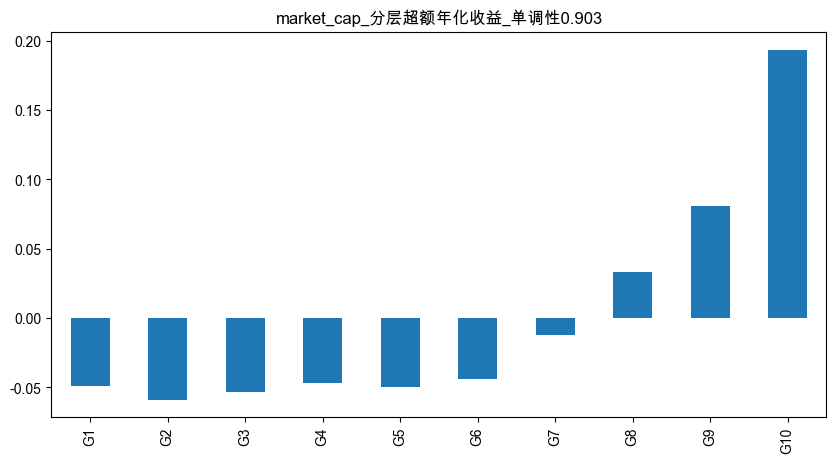

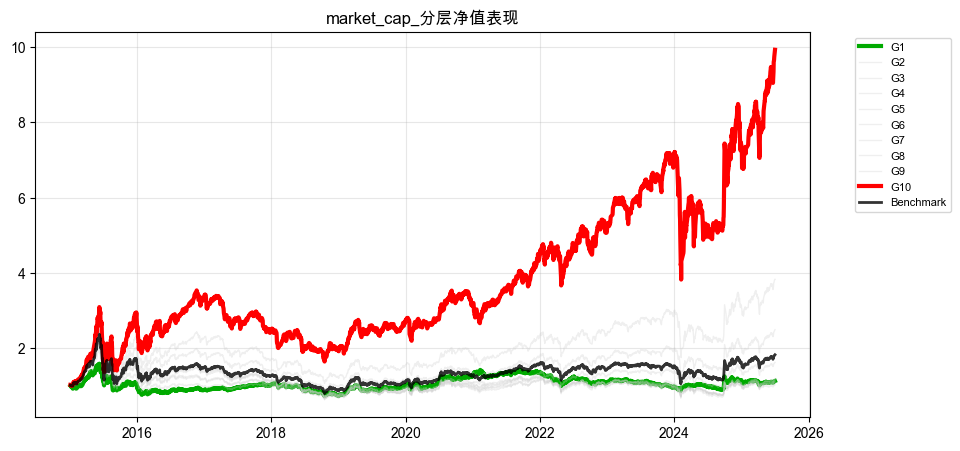

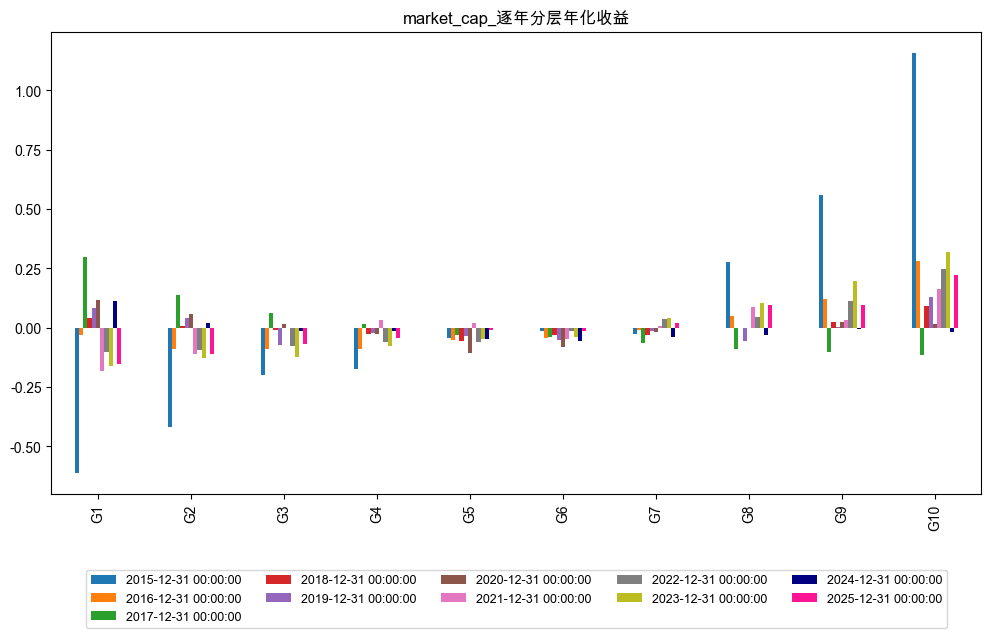

In [4]:
ic, ic_report = calc_ic(processed_factor, change_days, index_item, "market_cap")
ret, turnover = factor_layered_backtest(
    processed_factor, change_days, group_num, index_item, name="market_cap"
)

In [ ]:
buy_list = get_buy_list(processed_factor, rank_n=100)
df_weight = buy_list.div(buy_list.sum(axis=1), axis=0)
df_weight = df_weight.shift(1).dropna(how="all")
rebalance_frequency = 20
account_result = backtest(df_weight, rebalance_frequency=rebalance_frequency)
performance_cumnet, result = get_performance_analysis(
    account_result, benchmark_index=index_item
)

In [ ]:
performance_annual_performance = (
    performance_cumnet.pct_change().resample("Y").apply(lambda x: (1 + x).prod() - 1).T
)
display(performance_annual_performance)